In [1]:
import os
import torch.backends.cudnn as cudnn
import torch
import yaml
from utils import AttrDict
import pandas as pd
from train import train
from data_prepare import create_csv

#### Install packages

In [2]:
# !pip install torch
# !pip install natsort
# !pip install torchvision
# !pip install pyyaml
# !pip install pandas
# !pip install nltk

In [3]:
cudnn.benchmark = True
cudnn.deterministic = False
torch.cuda.is_available()

True

#### Training

In [4]:
# path = os.path.join('all_data','training','training')
# create_csv(path)

In [5]:
def get_config(file_path):
    with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)
    opt = AttrDict(opt)
    if opt.lang_char == 'None':
        characters = ''
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], 'training' ,data, 'labels.csv')
            df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
        print(f'experiment: {opt.experiment_name}')
        print(f'char in train_set:{opt.character} class:{len(opt.character)}')
    else:
        characters = ''
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], 'training' ,data, 'labels.csv')
            df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
        print(f'experiment: {opt.experiment_name}')
        print(f'char in train_set:{opt.character} class:{len(opt.character)}')
        opt.character = opt.lang_char
        print(f'char in config:{opt.character} class:{len(opt.character)}')
    os.makedirs(f'./saved_models/{opt.experiment_name}', exist_ok=True)
    return opt

albe to config in config_files/*.yaml
check list: \
&emsp;lang_char \
&emsp;experiment_name \
&emsp;num_iter \
&emsp;saved_model \
&emsp;lr \
&emsp;model architecture \
&emsp;check log

In [6]:
opt = get_config("config_files/rosetta_100k.yaml")
train(opt, amp=False)

experiment: crnn_100k_lr_25e-2
char in train_set: !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤลฦวศษสหฬอฮฯะัาำิีึืฺุูเแโใไๅๆ็่้๊๋์ํ๐๑๒๓๔๕๖๗๘๙–‘’ class:180
char in config:0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`|~กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤลฦวศษสหฬอฮฯะัาำิีึืุูเแโใไๅๆ็่้๊๋์ํ๐๑๒๓๔๕๖๗๘๙–‘ ’ class:177
Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: all_data/training
opt.select_data: ['']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_log dataset_root:    all_data/training	 dataset: 
all_data/training/training
sub-directory:	/training	 num samples: 99331
num total samples of : 99331 x 1.0 (total_dat

loss: 0.518: 100%|█████████▉| 3999/4000 [12:00<00:00,  5.56it/s]

end the training


SystemExit: 

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
label_path = [ './saved_models/rosetta_100k_lr_25e-2/log_loss_train.txt'
]
loss_list = []
for path in label_path:
    with open(path, encoding='utf8') as file:
        lines = file.readlines()
        for line in lines:
            if not line.startswith('experiment_name'):
                loss_list.append(float(line.split(' ')[3]))
print(loss_list[1])

87.108


per iter

2000


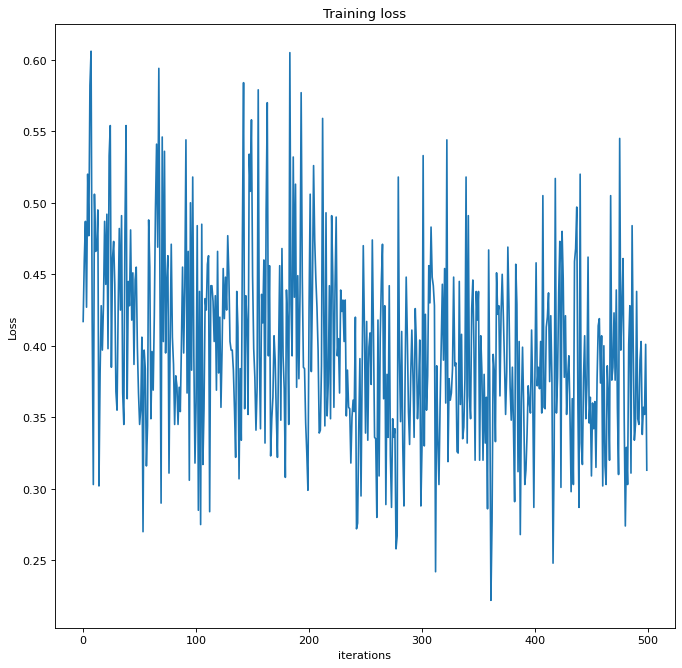

In [6]:
import matplotlib.pyplot as plt
import numpy as np
print(len(loss_list))
start_row = 15000
start = int(start_row /10)
# plt.plot(np.arange(len(loss_list[start:]))*10+start_row, loss_list[start:])
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(loss_list[start:])

plt.title(f'Training loss afer {start_row} iterations')
plt.title(f'Training loss')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()

per epoch

2000


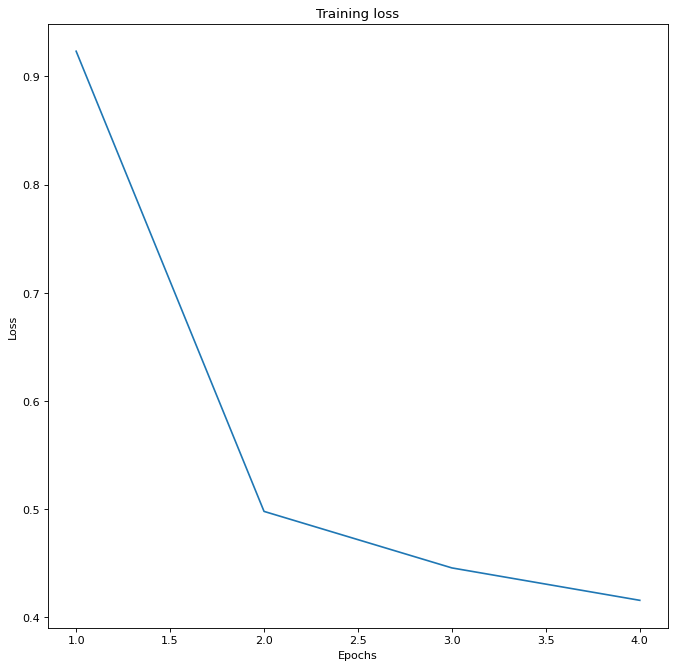

In [7]:
import matplotlib.pyplot as plt
import numpy as np
print(len(loss_list))
batch_size = 32
iteration = len(loss_list)*10
n_sample = 99331
epoch = (iteration*batch_size) // n_sample
epoch_avg = np.array([])
for i in range(epoch):
    epoch_avg = np.append(epoch_avg, np.mean(loss_list[int(i*n_sample/320):(i+1)*int(i*n_sample/320)]))
plt.figure(figsize=(10, 10), dpi=80)
start_row = 0
start = int(start_row /10)
# plt.plot(np.arange(len(loss_list[start:]))*10+start_row, loss_list[start:])
plt.plot(epoch_avg[:5])
# plt.title(f'Training loss afer {start_row} iterations')
plt.title(f'Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()